In [6]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [7]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [7]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 0, combineFiles=True)
# ics = arepo.Snapshot(basepath + 'ics/GSEiso_fg0.5_Z-1.2_metals-in-ics/lvl4/ics-with-grid.hdf5')
# ics_no_grid = arepo.Snapshot(basepath + 'ics/GSEiso_fg0.5_Z-1.2_metals-in-ics/lvl4/ics.hdf5')


In [16]:
print(sn.NumPart_Total[2] * sn.MassTable[2])
print(np.sum(sn.part0.mass))

0.299488509651193
0.2995885


In [4]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)
    

(0.0, 6.244398851047487)

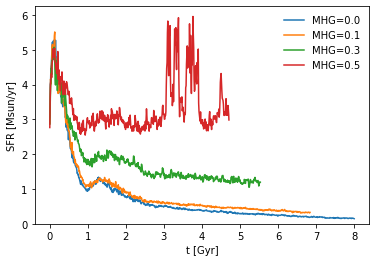

In [17]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
# sfh_file_corona = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_corona/lvl4/output/sfr.txt')
# sfh_file_corona02 = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_coronaMHG0.02/lvl4/output/sfr.txt')
sfh_file_corona1 = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_coronaMHG0.1/lvl4/output/sfr.txt')
sfh_file_corona3 = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_coronaMHG0.3/lvl4/output/sfr.txt')
sfh_file_corona5 = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_coronaMHG0.5/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
# time_c, sfr_c = bin_sfr(sfh_file_corona[:,0], sfh_file_corona[:,2])
# time_c02, sfr_c02 = bin_sfr(sfh_file_corona02[:,0], sfh_file_corona02[:,2])
time_c1, sfr_c1 = bin_sfr(sfh_file_corona1[:,0], sfh_file_corona1[:,2])
time_c3, sfr_c3 = bin_sfr(sfh_file_corona3[:,0], sfh_file_corona3[:,2])
time_c5, sfr_c5 = bin_sfr(sfh_file_corona5[:,0], sfh_file_corona5[:,2])

plt.plot(time, sfr, label='MHG=0.0')
# plt.plot(time_c, sfr_c, label='MHG=0.01')
# plt.plot(time_c02, sfr_c02, label='MHG=0.02')
plt.plot(time_c1, sfr_c1, label='MHG=0.1')
plt.plot(time_c3, sfr_c3, label='MHG=0.3')
plt.plot(time_c5, sfr_c5, label='MHG=0.5')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)

(0.0, 5.6684903026473785)

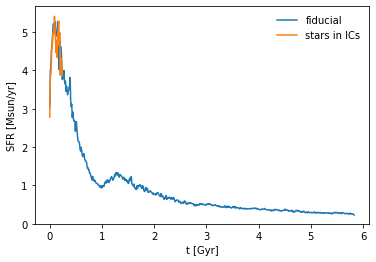

In [8]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_star = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_star/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_s, sfr_s = bin_sfr(sfh_file_star[:,0], sfh_file_star[:,2])

plt.plot(time, sfr, label='fiducial')
plt.plot(time_s, sfr_s, label='stars in ICs')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)

(0.0, 5.921667091702452)

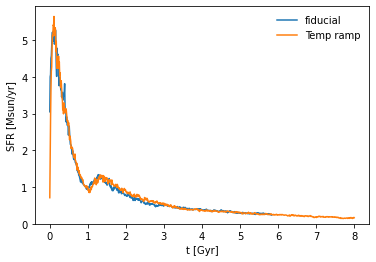

In [12]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_relax = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4-Vadim/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_r, sfr_r = bin_sfr(sfh_file_relax[:,0], sfh_file_relax[:,2])
plt.plot(time, sfr, label='fiducial')
plt.plot(time_r, sfr_r, label='Temp ramp')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)

(0.0, 5.861920961681557)

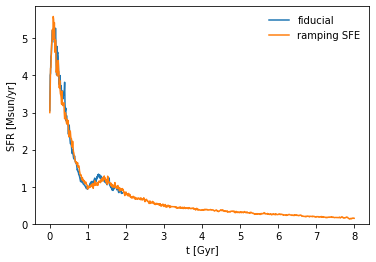

In [17]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_tSF = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_tSF/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_t, sfr_t = bin_sfr(sfh_file_tSF[:,0], sfh_file_tSF[:,2])
plt.plot(time, sfr, label='fiducial')
plt.plot(time_t, sfr_t, label='ramping SFE')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)

(0.0, 5.518446507389141)

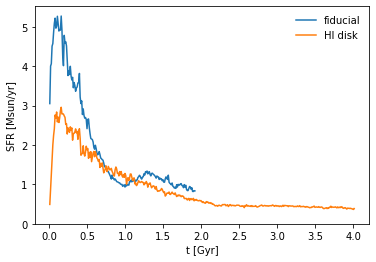

In [43]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output-old/sfr.txt')
sfh_file_HI = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_HI/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_HI, sfr_HI = bin_sfr(sfh_file_HI[:,0], sfh_file_HI[:,2])
plt.plot(time, sfr, label='fiducial')
plt.plot(time_HI, sfr_HI, label='HI disk')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)

(0.0, 5.52482834332943)

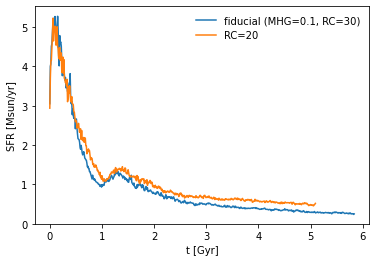

In [14]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_RC = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_coronaMHG0.1_RC20/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_RC, sfr_RC = bin_sfr(sfh_file_RC[:,0], sfh_file_RC[:,2])
plt.plot(time, sfr, label='fiducial (MHG=0.1, RC=30)')
plt.plot(time_RC, sfr_RC, label='RC=20')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)

(0.0, 5.531047547560545)

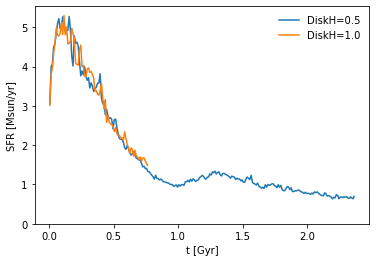

In [21]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_DH = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_DiskH1.0/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_DH, sfr_DH = bin_sfr(sfh_file_DH[:,0], sfh_file_DH[:,2])
plt.plot(time, sfr, label='DiskH=0.5')
plt.plot(time_DH, sfr_DH, label='DiskH=1.0')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)

(0.0, 8.773541220172532)

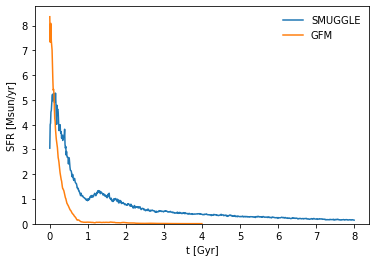

In [54]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_GFM = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_GFM/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_GFM, sfr_GFM = bin_sfr(sfh_file_GFM[:,0], sfh_file_GFM[:,2])
plt.plot(time, sfr, label='SMUGGLE')
plt.plot(time_GFM, sfr_GFM, label='GFM')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)

In [56]:
sn000_GFM = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0_GFM/lvl4/output/', 0, combineFiles=True)
sn200_GFM = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0_GFM/lvl4/output/', 200, combineFiles=True)

Mg0 = np.sum(sn000_GFM.part0.mass.value)
Mg200 = np.sum(sn200_GFM.part0.mass.value)

center = np.array([sn200_GFM.BoxSize, sn200_GFM.BoxSize, sn200_GFM.BoxSize])/2.
pos = sn200_GFM.part0.pos.value - center
R = np.linalg.norm(pos[:,:2], axis=1)
z = pos[:,2]

key = np.logical_and(R < 8, z < 1.5)
Mg200_indisk = np.sum(sn200_GFM.part0.mass.value[key])

print(Mg0, Mg200)
print('in disk', Mg200_indisk)

0.29958847 0.18950638
in disk 0.008198095


(0.0, 2.0)

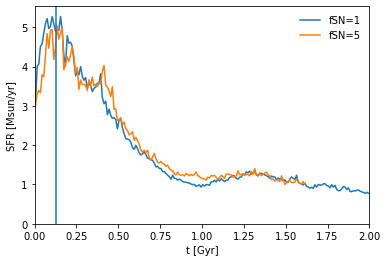

In [75]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_fSN = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_fSN5/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_fSN, sfr_fSN = bin_sfr(sfh_file_fSN[:,0], sfh_file_fSN[:,2])
plt.plot(time, sfr, label='fSN=1')
plt.plot(time_fSN, sfr_fSN, label='fSN=5')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.axvline(0.005*25)
plt.ylim(0, None)
plt.xlim(0, 2)

(0.0, 2.0)

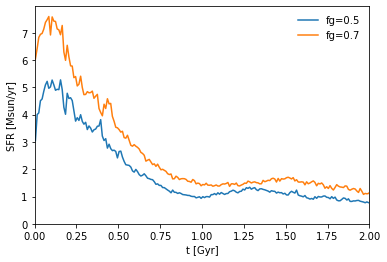

In [5]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_fg = np.genfromtxt(basepath+'runs/MWiso_fg0.7_Z0/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_fg, sfr_fg = bin_sfr(sfh_file_fg[:,0], sfh_file_fg[:,2])
plt.plot(time, sfr, label='fg=0.5')
plt.plot(time_fg, sfr_fg, label='fg=0.7')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
# plt.axvline(0.005*25)
plt.ylim(0, None)
plt.xlim(0, 2)

(0.0, 2.0)

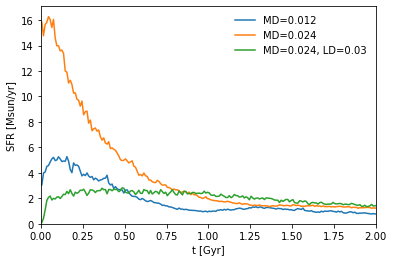

In [6]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_MD = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0_MD24/lvl4/output/sfr.txt')
sfh_file_MD_LD = np.genfromtxt(basepath+'runs/MWiso_fg0.5_MD24_LD3/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_MD, sfr_MD = bin_sfr(sfh_file_MD[:,0], sfh_file_MD[:,2])
time_MD_LD, sfr_MD_LD = bin_sfr(sfh_file_MD_LD[:,0], sfh_file_MD_LD[:,2])
plt.plot(time, sfr, label='MD=0.012')
plt.plot(time_MD, sfr_MD, label='MD=0.024')
plt.plot(time_MD_LD, sfr_MD_LD, label='MD=0.024, LD=0.03')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
# plt.axvline(0.005*25)
plt.ylim(0, None)
plt.xlim(0, 2)

(0.0, 8.0)

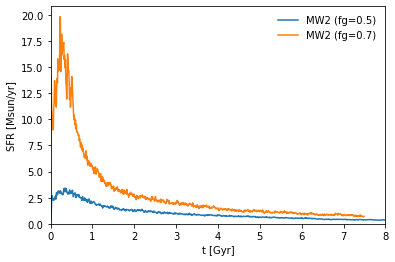

In [18]:
sfh_file = np.genfromtxt(basepath+'runs/MW2iso_fg0.5_Z0/lvl4/output/sfr.txt')
sfh_file_fg7 = np.genfromtxt(basepath+'runs/MW2iso_fg0.7/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_fg7, sfr_fg7 = bin_sfr(sfh_file_fg7[:,0], sfh_file_fg7[:,2])
plt.plot(time, sfr, label='MW2 (fg=0.5)')
plt.plot(time_fg7, sfr_fg7, label='MW2 (fg=0.7)')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
# plt.axvline(0.005*25)
plt.ylim(0, None)
plt.xlim(0, 8)

(0.0, 2.0)

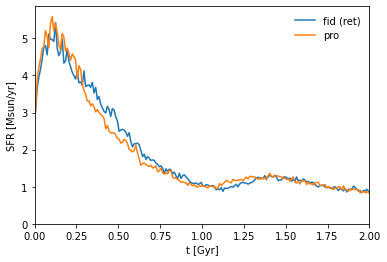

In [16]:
sfh_file = np.genfromtxt(basepath+'runs/fgGSE0.5_fgMW0.5/lvl4/output/sfr.txt')
sfh_file_pro = np.genfromtxt(basepath+'runs/fgGSE0.5_fgMW0.5_pro/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_pro, sfr_pro = bin_sfr(sfh_file_pro[:,0], sfh_file_pro[:,2])
plt.plot(time, sfr, label='fid (ret)')
plt.plot(time_pro, sfr_pro, label='pro')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
# plt.axvline(0.005*25)
plt.ylim(0, None)
plt.xlim(0, 2)

In [ ]:
sn000 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output/', 0, combineFiles=True)
sn200 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output/', 200, combineFiles=True)

In [38]:
Mg000 = np.sum(sn000.part0.mass)
Mg200 = np.sum(sn200.part0.mass)

Ms000 = sn000.NumPart_Total[2] * sn000.MassTable[2]
Ms200 = sn200.NumPart_Total[2] * sn200.MassTable[2] + np.sum(sn200.part4.mass)

print('Mg000=', Mg000, 'gas fraction=', Mg000/(Mg000+Ms000))
print('Mg000=', Mg200, 'gas fraction=', Mg200/(Mg200+Ms200))


Mg000= 0.2995885 gas fraction= 0.5000834548817207
Mg000= 0.1452893 gas fraction= 0.24258056642044354


In [39]:
center = np.array([sn000.BoxSize, sn000.BoxSize, sn000.BoxSize])/2.
pos000 = sn000.part0.pos.value - center
pos200 = sn200.part0.pos.value - center

R000 = np.linalg.norm(pos000[:,:2], axis=1)
R200 = np.linalg.norm(pos200[:,:2], axis=1)
z000 = pos000[:,2]
z200 = pos200[:,2]

key000 = np.logical_and(R000<10, np.abs(z000)<1)
key200 = np.logical_and(R200<10, np.abs(z200)<1)

Mg000 = np.sum(sn000.part0.mass[key000])
Mg200 = np.sum(sn200.part0.mass[key200])

print('Mg000=', Mg000)
print('Mg000=', Mg200)


Mg000= 0.29931372
Mg000= 0.13854168


### Loading Factors

In [19]:
fname = basepath + 'anlys/loading/loading_MWiso_fg0.5_Z0-lvl4.npy'
loading = np.load(fname, allow_pickle=True).item()

(0.0, 2.5)

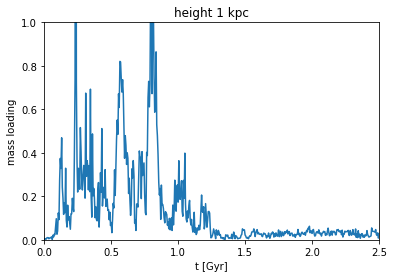

In [32]:
plt.plot(loading['Time'], loading['Mdot_out_1']/loading['SFR_CodeUnits'])
# plt.plot(loading['Time'], loading['Mdot_out_3']/loading['SFR_CodeUnits'])
# plt.plot(loading['Time'], loading['Mdot_out_5']/loading['SFR_CodeUnits'])
plt.xlabel('t [Gyr]')
plt.ylabel('mass loading')
plt.title('height 1 kpc')
plt.ylim(0, 1)
plt.xlim(0, 2.5)

(0.0, 2.5)

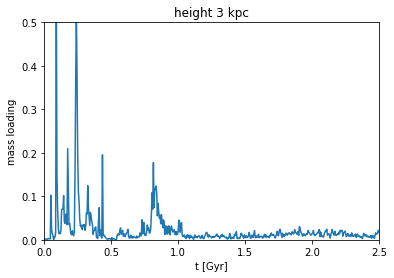

In [35]:
# plt.plot(loading['Time'], loading['Mdot_out_1']/loading['SFR_CodeUnits'])
plt.plot(loading['Time'], loading['Mdot_out_3']/loading['SFR_CodeUnits'])
# plt.plot(loading['Time'], loading['Mdot_out_5']/loading['SFR_CodeUnits'])
plt.xlabel('t [Gyr]')
plt.ylabel('mass loading')
plt.title('height 3 kpc')
plt.ylim(0, 0.5)
plt.xlim(0, 2.5)

(0.0, 2.5)

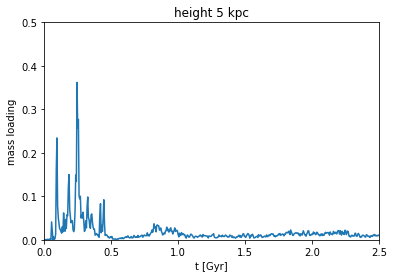

In [36]:
# plt.plot(loading['Time'], loading['Mdot_out_1']/loading['SFR_CodeUnits'])
# plt.plot(loading['Time'], loading['Mdot_out_3']/loading['SFR_CodeUnits'])
plt.plot(loading['Time'], loading['Mdot_out_5']/loading['SFR_CodeUnits'])
plt.xlabel('t [Gyr]')
plt.ylabel('mass loading')
plt.title('height 5 kpc')
plt.ylim(0, 0.5)
plt.xlim(0, 2.5)

In [50]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
sfr_cu = sfr * (9.7779E8/1E10)

In [51]:
mass_lost = np.trapz(sfr_cu[time<1], time[time<1])
print(mass_lost)

0.2657142728196904
